# Learner Analysis



---

Compare the performances of various learners such as Decision Tree Learner, Random Tree Learner, and Bag Learner

Import relevant libraries and modules

In [6]:
import warnings
from analyze_learners_util import *
import DTLearner as dtl
import RTLearner as rtl
import BagLearner as bl
import matplotlib.pyplot as plt
%matplotlib inline

Read in a file, process it and split it into training and test sets

In [7]:
trainX, trainY, testX, testY = process_data("Data/Istanbul.csv", train_size=0.6)

Remove the header
Remove the non-numerical column (1st one)


Specifiy the max value of the leaf size range on which we train a tree learner, and the number of iterations per leaf size.

In [8]:
max_leaf_size = 200
num_iterations = 20

## 1) Train and evaluate a Decision Tree Learner

Train and test a DTLearner on various leaf sizes. Then compare the root mean squared errors (RMSEs) between the in sample (training set) and out sample data (test set) to evaluate where overfitting occurs.

Train the data and retrieve the RMSEs and correlations for in sample and out of sample data.

In [9]:
# Ignore RuntimeWarning caused by scipy.stats.pearsonr
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    RMSEin_mean, RMSEout_mean, CORRin_mean, CORRout_mean = train_test_learner(trainX, trainY, testX, testY,
    dtl.DTLearner, max_leaf_size=max_leaf_size, num_iterations=num_iterations)

Plot the RMSEs and correlations

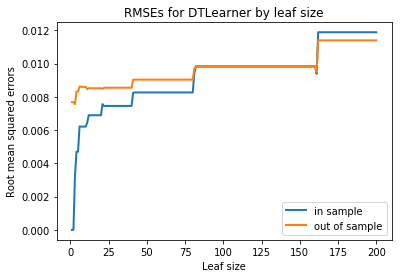

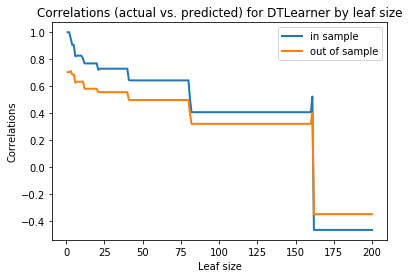

In [10]:
plot_results(RMSEin_mean, RMSEout_mean, "RMSEs for DTLearner by leaf size", 
    "Leaf size", "Root mean squared errors", xaxis_length=max_leaf_size)
plot_results(CORRin_mean, CORRout_mean, "Correlations (actual vs. predicted) for DTLearner by leaf size", 
    "Leaf size", "Correlations", "upper right", max_leaf_size)

Find the first leaf_size where the decision tree doesn't overfit, i.e. when in-sample error is higher than out-of-sample error

In [20]:
import numpy as np
RMSE_in_minus_out = np.subtract(RMSEin_mean, RMSEout_mean)
np.argmax(RMSE_in_minus_out>0)

81

Correlations between predicted and actual results for in-sample/out-of-sample data with leaf_size = 1

In [28]:
print ("In-sample correlation for leaf_size = 1:", CORRin_mean[1])
print ("In-sample correlation for leaf_size = 50:", CORRin_mean[50])
print ("Out-of-sample correlation for leaf_size = 1:", CORRout_mean[1])

In-sample correlation for leaf_size = 1: 1.0
In-sample correlation for leaf_size = 50: 0.642701795417
Out-of-sample correlation for leaf_size = 1: 0.704205669918


### Understand the results

Overfitting occurs with respect to leaf_size when leaf_size is less than 81. We can see this in the first figure: Between 1 and 80 leaf_size range, the in-sample RMSE is lower than out-of-sample RMSE. 

#### _Other testing observations:_
The correlation between predicted and actual results for:
- in-sample data exceeds 0.95 with leaf_size = 1
- in-sample data is below 0.95 with leaf_size = 50
- out-of-sample data exceeds 0.15 with leaf_size = 1